# Univariate Linear Regression (California Housing Dataset)

More info on dataset: https://github.com/ageron/handson-ml/tree/master/datasets/housing

## Load libraries

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

!pip install pyproj==1.9.6

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

## Load dataset

In [8]:
dataset = fetch_california_housing()

df = pd.DataFrame(data= np.c_[dataset.data, 100000*dataset.target],
                     columns = dataset.feature_names + ['target'])

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


## Preliminary data analytics

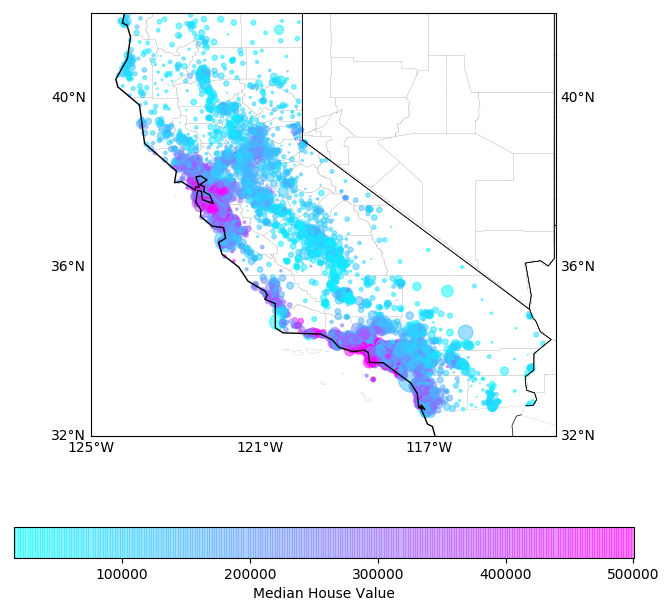

In [9]:
fig = plt.figure(figsize=(8, 8), dpi=100)

lat_min = np.round(df.Latitude.min()-0.2)
lat_max = np.round(df.Latitude.max()+0.2)
lon_min = np.round(df.Longitude.min()-0.2)
lon_max = np.round(df.Longitude.max()+0.2)

m = Basemap(projection='cyl',
            resolution='l', 
            llcrnrlat=lat_min,
            urcrnrlat=lat_max,
            llcrnrlon=lon_min,
            urcrnrlon=lon_max)

m.drawcoastlines(color='black')
m.drawcounties(color='gray')
m.drawstates(color='black')


m.drawparallels(np.arange(lat_min, lat_max, 4),
                labels=[1, 1, 0, 1],
                dashes=[6,900],
                color='w')

m.drawmeridians(np.arange(lon_min, lon_max, 4),
                labels=[1, 1, 0, 1],
                dashes=[6,900],
                color='w')

plt.scatter(df.Longitude, 
            df.Latitude, 
            s=df.Population/100,
            label="Population",
            c=df.target, 
            cmap=plt.get_cmap("cool"),
            alpha=.5)

cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('Median House Value')

plt.show()

In [0]:
df.corr()['target'].sort_values(ascending=False)

target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64

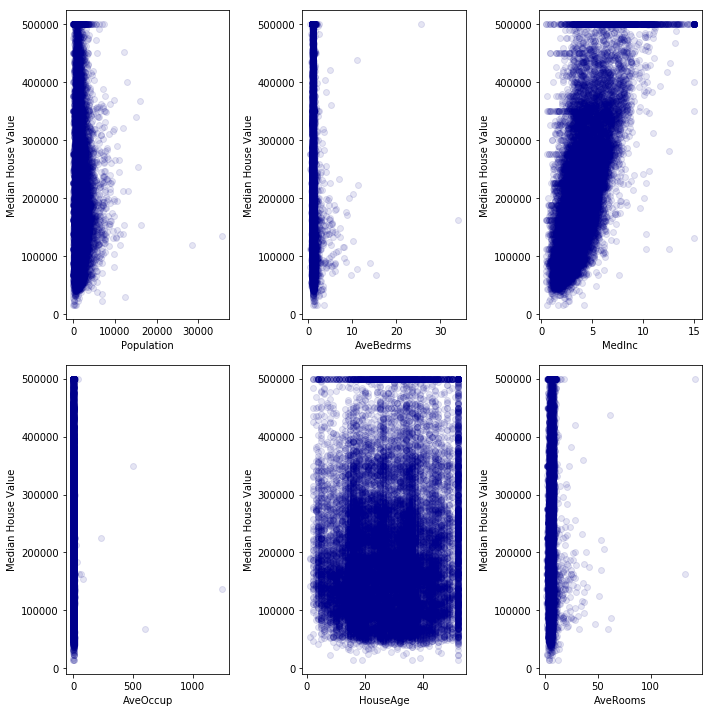

In [0]:
fig = plt.figure(figsize=(10,10))
for i, var in enumerate(set(df) - {'Latitude', 'Longitude', 'target'}):
    ax = fig.add_subplot(2,3,i+1)
    plt.scatter(df[var], df['target'], alpha=0.1, c='darkblue')
    plt.xlabel(var)
    plt.ylabel('Median House Value')
    # uncomment for logarithmic x-axis:
    # ax.set_xscale('log')
fig.tight_layout()

## Univariate Linear Regression


We observe that the highest correlation exists between the target variable and `MedInc`. Therefore, we'll use this variable to create a univariate regression model. **Ideally, we should have split the df into train/test before the exploratory data analytics.**

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['MedInc'].values.reshape(-1, 1),
    df['target'],
    test_size=0.2,
    random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression

uniLR = LinearRegression(n_jobs=-1).fit(X_train, y_train)
y_pred = uniLR.predict(X_test)

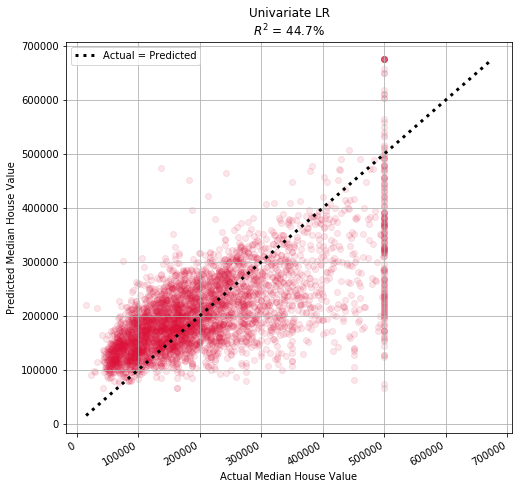

In [25]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('Univariate LR\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')

plt.grid()
plt.legend()

fig.autofmt_xdate()
plt.show()